# DREAM EXPERIMENT: angular analysis of generated muons

Importing modules

In [3]:
import matplotlib.pyplot as plt
import numpy as np

## Angular distribution of muons

Loading data from `positions.txt`:

In [4]:
# loading data from simulation
x,y,theta,phi = np.loadtxt("positions.txt", unpack=True, usecols=(0,1,2,3))
directions = np.loadtxt("positions.txt", unpack=True, usecols=(4,5,6))
positions = np.loadtxt("positions.txt", unpack=True, usecols=(7,8,9))
angles_check = np.loadtxt("goodangles.txt", unpack=True, usecols=(0))

# corrections due to the new generation method
for idx,t in enumerate(theta):
    theta[idx] = np.pi - t

# rescaling of units: mm -> cm
x = 0.1*x
y = 0.1*y

# number of Monte Carlo events
if(len(x)==len(y)==len(theta)==len(phi)):
    print('Data are of equal length. You have {0} events'.format(len(x)))
else:
    print('There are problems in reading out data')

Data are of equal length. You have 23067 events


Theoretical distributions of randomic angles:
- Polar angle $\phi \in [0,2\pi]$:
$$p(\phi) = \frac{1}{2\pi}$$
- Azimuthal angle $\theta \in [0,\frac{\pi}{2}]$ (restriction):
$$p(\theta) = 3\cos(\theta)^2$$

In [5]:
# theoretical distribution functions of angles
def Ptheta(x):
    return 4*np.cos(x)*np.cos(x)/np.pi

# generation of samples for theta
sample_angles_theta = np.arange(0, 0.5*np.pi, 0.01)
sample_angulardistribution_theta = Ptheta(sample_angles_theta)

# generation of samples for phi
sample_angles_phi = np.arange(0, 2*np.pi, 0.01)
sample_angulardistribution_phi = [0.5/np.pi for i in np.arange(0, len(sample_angles_phi))]

Histograms of randomic angles

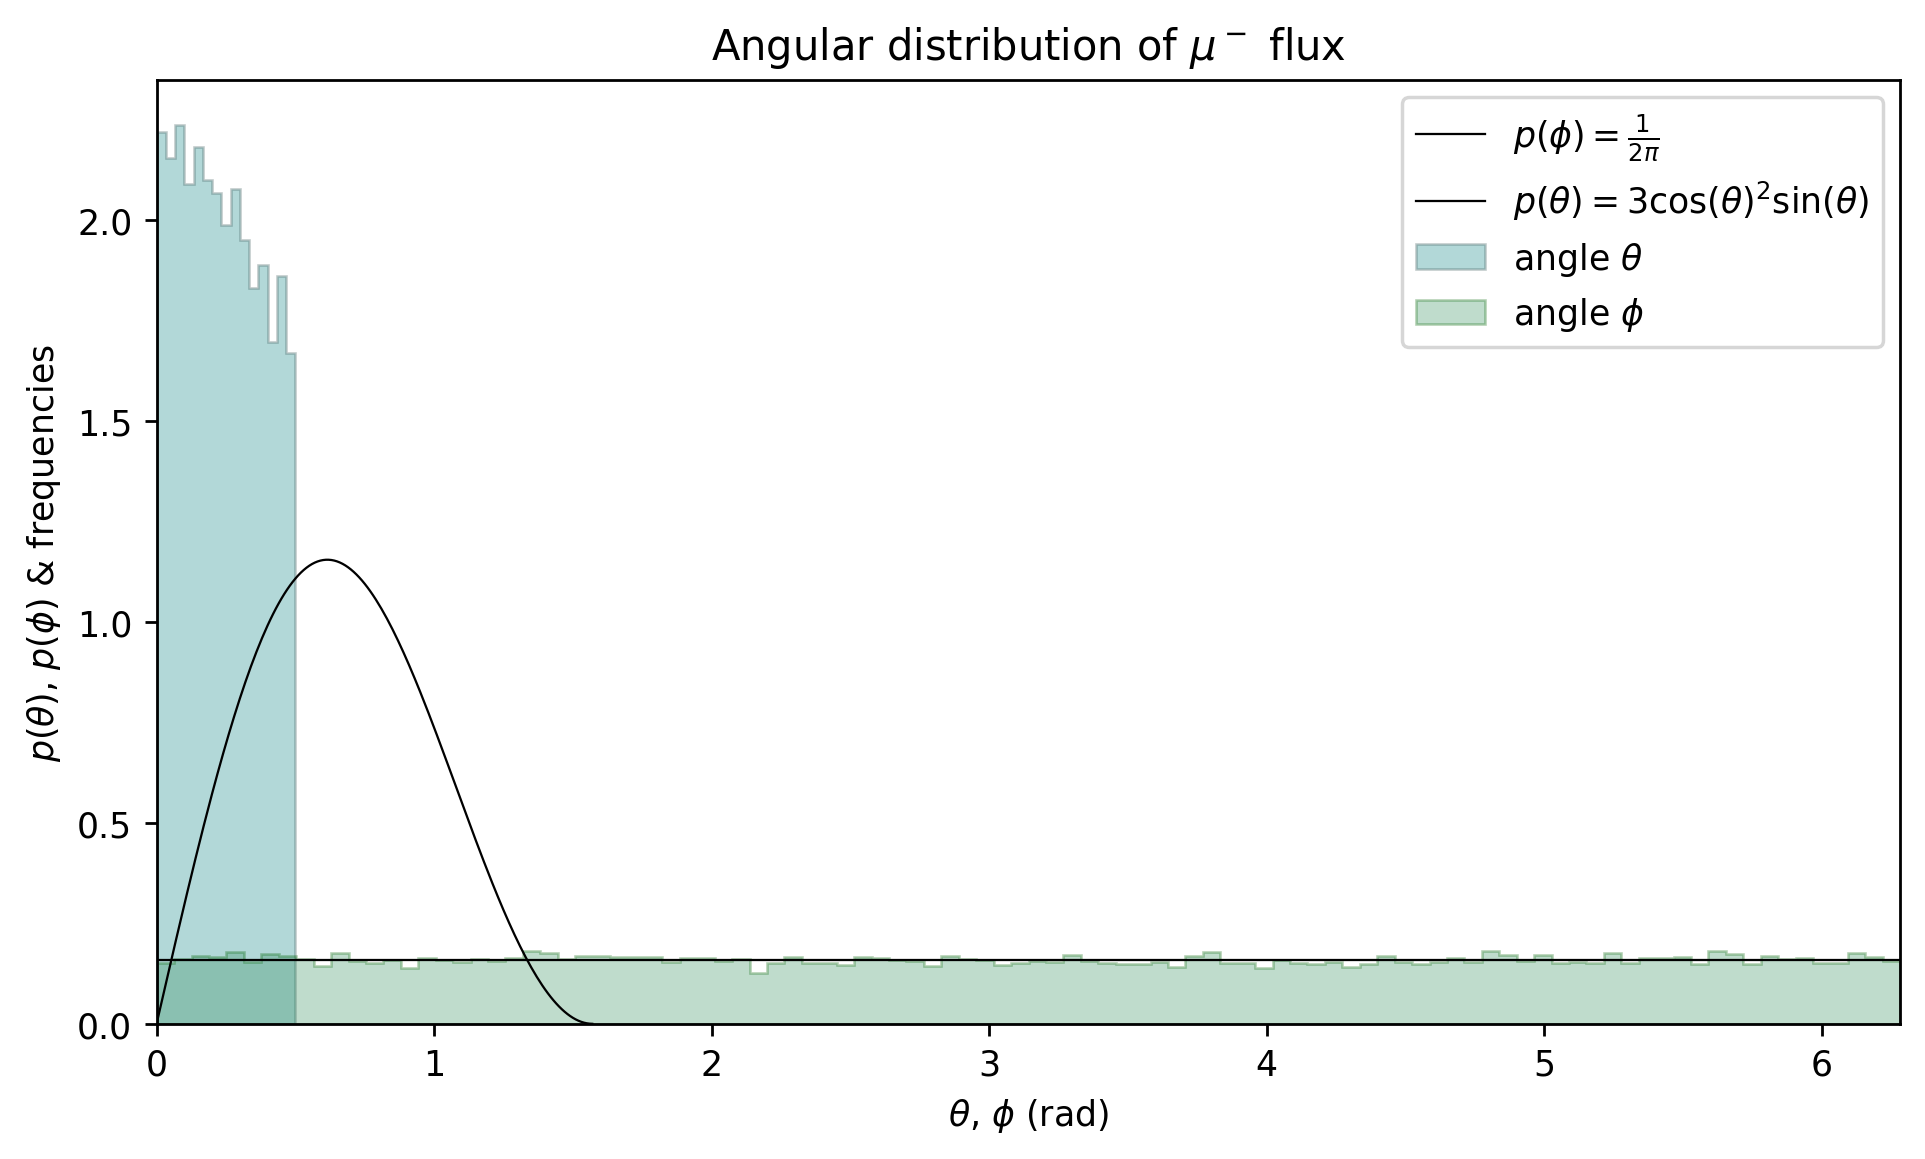

In [12]:
# prepare the figure
fig = plt.figure(111, figsize=(9,5), dpi=250)

#plot of histos & functions
plt.hist(theta, bins=15, label=r'angle $\theta$', histtype="stepfilled",
         color="teal", ec="darkslategray", alpha=0.3, lw=0.75, density=True)
plt.hist(phi, bins=100, label=r'angle $\phi$', histtype='stepfilled',
         color="seagreen", ec="darkgreen", alpha=0.3,  lw=0.75, density=True)
#plt.plot(sample_angles_theta, sample_angulardistribution_theta,
#         label=r'$p(\theta)=\frac{4}{\pi}\cos(\theta)^2$', lw=0.65 , color="black")
plt.plot(sample_angles_phi, sample_angulardistribution_phi,
         label=r'$p(\phi) = \frac{1}{2\pi}$', lw=0.65, color='black')
plt.plot(sample_angles_theta, 3*np.cos(sample_angles_theta)*np.cos(sample_angles_theta)*np.sin(sample_angles_theta),
         label=r'$p(\theta)=3\cos(\theta)^2\sin(\theta)$', lw=0.65 , color="black")

# visualize
plt.title('Angular distribution of $\mu^-$ flux')
plt.xlabel(r'$\theta$, $\phi$ (rad)')
plt.ylabel(r'$p(\theta)$, $p(\phi)$ & frequencies')
plt.xlim(0, 2*np.pi)
plt.legend()
plt.show()
fig.savefig("AngularDistribution.jpg",bbox_inches='tight')

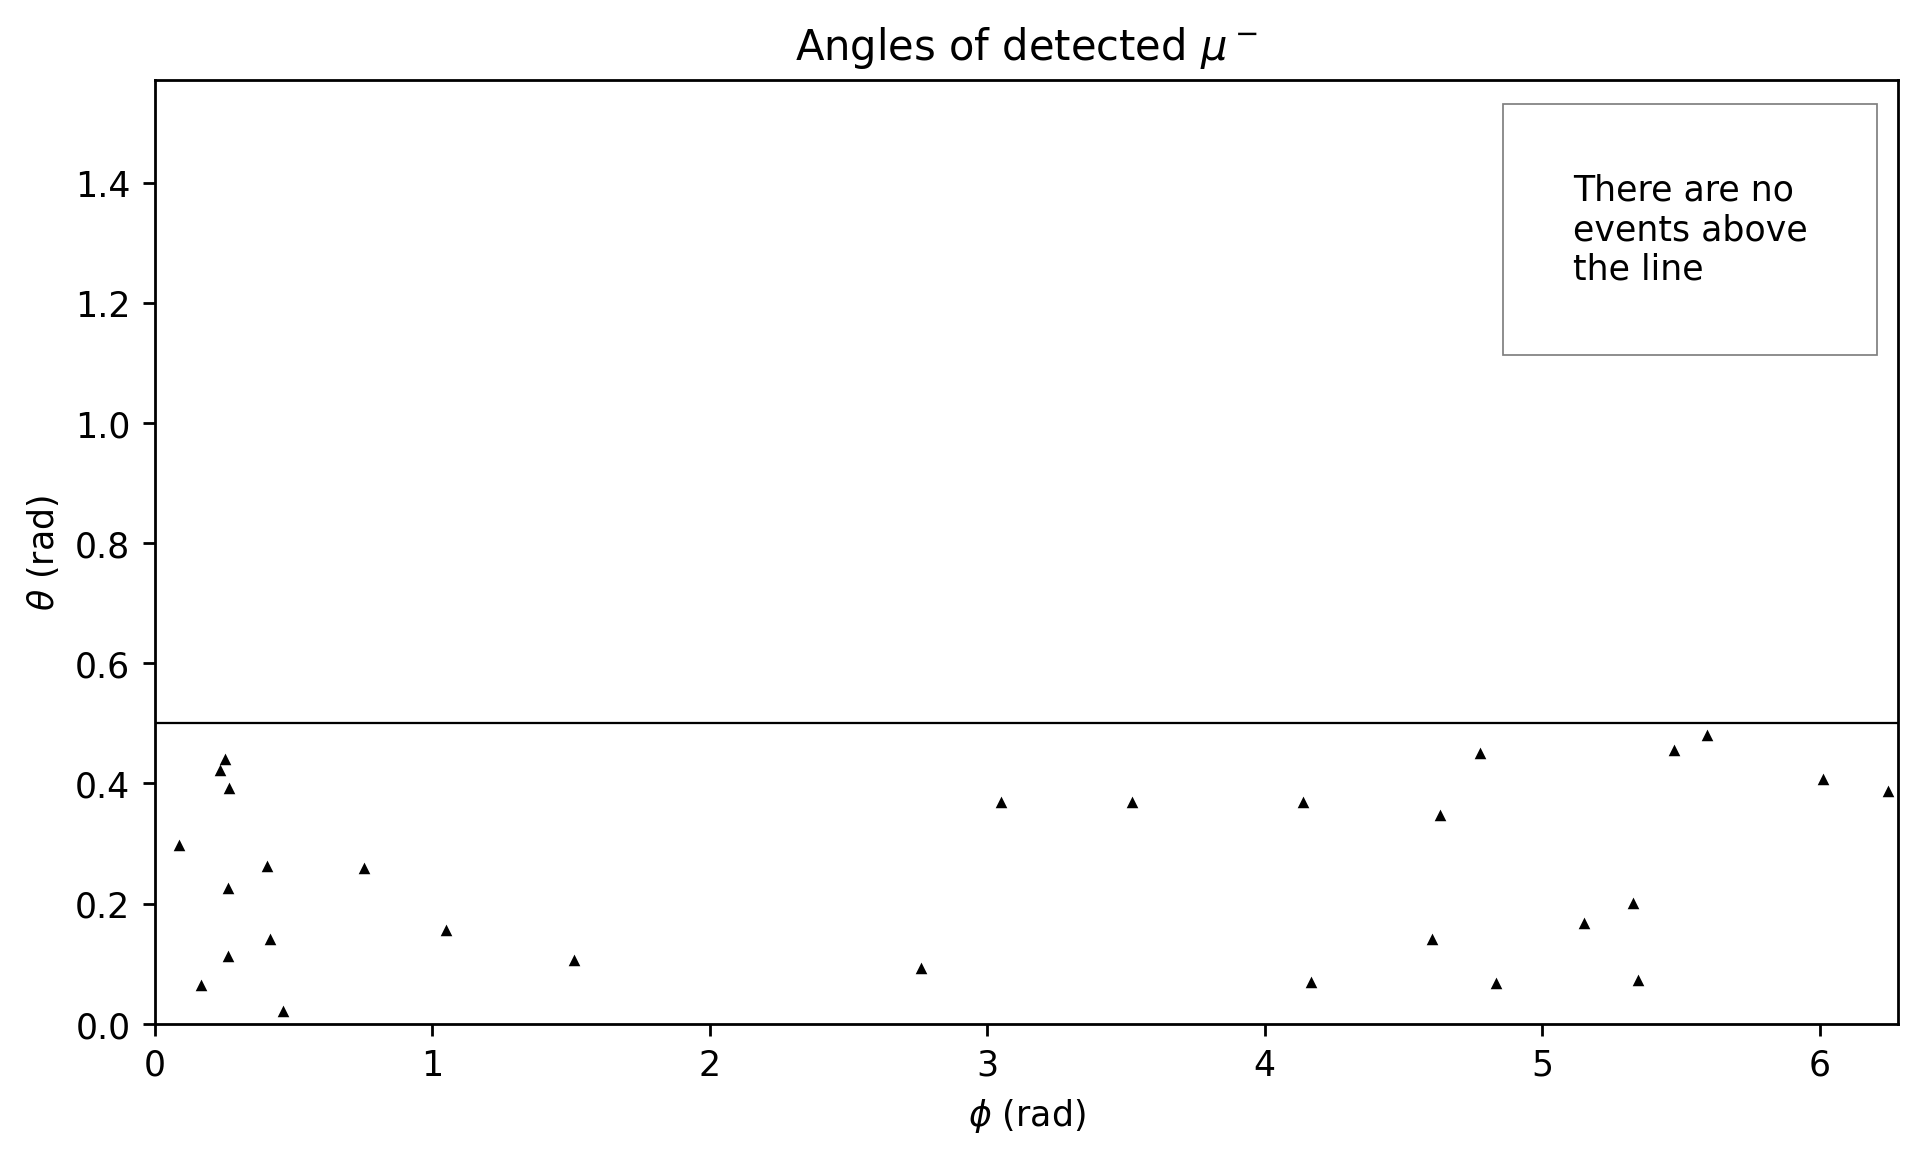

In [30]:
good_phis = []
good_thetas = []

# I want to find good angless to generate muons
for idx,check in enumerate(angles_check):
    if check==True:
        if idx<len(phi):
            good_phis.append(phi[idx])
            good_thetas.append(theta[idx])

# plot these angles to have an idea:
fig = plt.figure(111, figsize=(9,5), dpi=250)
plt.plot(good_phis, good_thetas, marker='^', markersize=2, lw=0, color='black')

# a line
sample_angles_phi = np.arange(0, 2*np.pi, 0.01)
sample_angulardistribution_phi = [0.5 for i in np.arange(0, len(sample_angles_phi))]
plt.plot(sample_angles_phi, sample_angulardistribution_phi, label='maximum value', lw=0.65, color='black')

# text
plt.text(5.11, 1.24, 'There are no\nevents above\nthe line',
         bbox={'facecolor': 'white', 'alpha': 0.5, 'lw': 0.5, 'pad': 20})

# visualize
plt.title('Angles of detected $\mu^-$')
plt.xlabel(r'$\phi$ (rad)')
plt.ylabel(r'$\theta$ (rad)')
plt.xlim(0, 2*np.pi)
plt.ylim(0, np.pi/2)
plt.show()
fig.savefig("good_angles.jpg",bbox_inches='tight')
